# Checking if a pair of stocks is cointegrated

## Imports

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import quiz_tests

In [3]:
# Set plotting options
%matplotlib inline
plt.rc('figure', figsize=(16, 9))

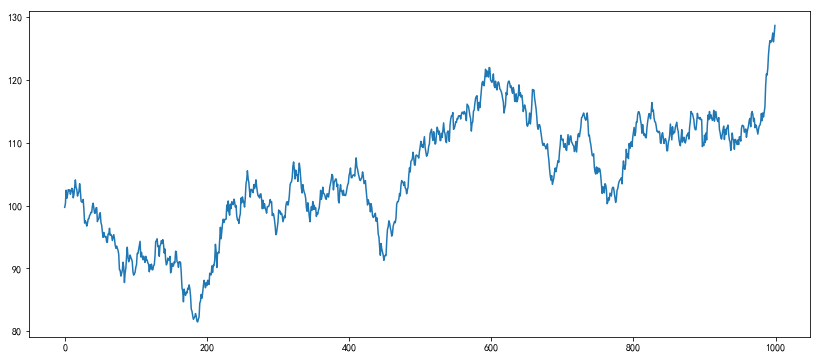

0      99.72323240
1     100.30508341
2     102.45348267
3     101.17399567
4     101.67627255
5     102.53230185
6     102.38951178
7     102.49959044
8     101.81152565
9     102.24508973
10    102.75531073
11    102.59017976
12    101.23840071
13    101.78503146
14    103.01568659
15    104.09213269
16    102.88150781
17    102.57483124
18    101.51741240
19    101.91946932
20    102.20863444
21    103.49136767
22    102.42567187
23    100.71903900
24    100.54624160
25    100.60995178
26    100.98058016
27     99.37603722
28     97.21030785
29     97.59067797
          ...     
970   113.90519298
971   112.39990537
972   112.87229855
973   112.62061662
974   112.02543900
975   111.38717297
976   112.16711196
977   112.70963913
978   112.82210132
979   113.29853983
980   114.67875769
981   113.53551459
982   114.76141047
983   114.12427444
984   114.87854377
985   115.78765702
986   119.11435491
987   120.94913135
988   120.77709878
989   121.83963860
990   124.04645782
991   125.35

In [5]:
# just set the seed for the random number generator
np.random.seed(2018)
# use returns to create a price series
drift = 100
r1 = np.random.normal(0, 1, 1000) 
s1 = pd.Series(np.cumsum(r1), name='s1') + drift
s1.plot(figsize=(14,6))
plt.show()
print(s1)

<module 'pandas' from '/root/anaconda2/envs/aind-dl/lib/python3.5/site-packages/pandas/__init__.py'>


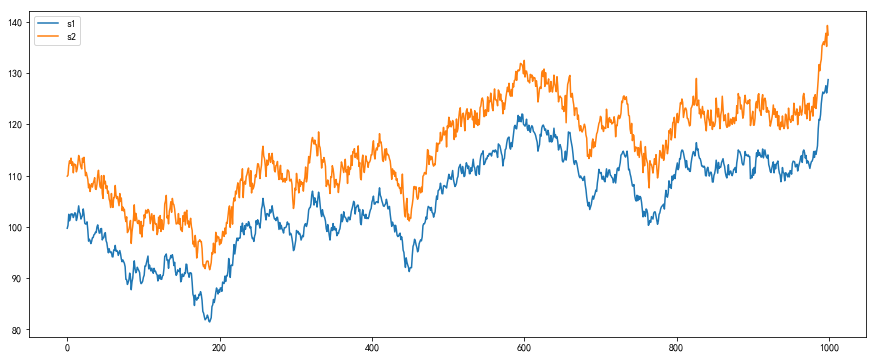

In [8]:
offset = 10
noise = np.random.normal(0, 1, 1000)
s2 = s1 + offset + noise
s2.name = 's2'
pd.concat([s1, s2], axis=1).plot(figsize=(15,6))
plt.show()

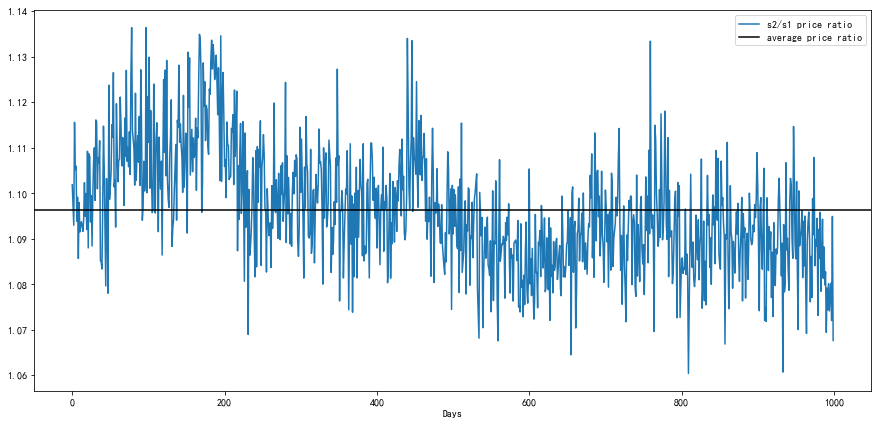

average price ratio 1.0962229550352345


In [16]:
price_ratio = s2/s1
price_ratio.plot(figsize=(15,7)) 
plt.axhline(price_ratio.mean(), color='black') 
plt.xlabel('Days')
plt.legend(['s2/s1 price ratio', 'average price ratio'])
plt.show()
print("average price ratio {}".format(price_ratio.mean()))

## Calculate hedge ratio with regression

## Linear Regression

Note that the LinearRegression().fit() expects 2D numpy arrays.  Since s1 and s2 are pandas series, we can use Series.values to get the values as a numpy array. Since these are 1D arrays, we can use numpy.reshape(-1,1) to make these 1000 row by 1 column 2 dimensional arrays

In [17]:
type(s1)

pandas.core.series.Series

In [18]:
type(s1.values)

numpy.ndarray

In [20]:
print(s1[:5])

0    99.72323240
1   100.30508341
2   102.45348267
3   101.17399567
4   101.67627255
Name: s1, dtype: float64


In [21]:
s1.values.reshape(-1,1).shape

(1000, 1)

In [24]:
print(s1.values.reshape(-1,1)[:5])

[[ 99.7232324 ]
 [100.30508341]
 [102.45348267]
 [101.17399567]
 [101.67627255]]


In [25]:
lr = LinearRegression()
lr.fit(s1.values.reshape(-1,1),s2.values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
hedge_ratio = lr.coef_[0][0]
hedge_ratio

0.997775252422778

In [31]:
intercept = lr.intercept_[0]
intercept

10.243087915670273

In [30]:
print("hedge ratio from regression is {:4f}, intercept is {:4f}".format(hedge_ratio,intercept))

hedge ratio from regression is 0.997775, intercept is 10.243088


 ## Question
 Do you think we'll need the intercept when calculating the spread?  Why or why not?    
 Since the intercept is a constant, it's not necesary to include it in the spread, since it just shifts the spread up by a constant. We use the spread to check when it deviates from its historical average, so what matters going foward is how the spread differs from this average.

## Calculate the spread

In [32]:
spread = s2 - s1 * hedge_ratio

In [39]:
#python 3.6 print
#print(f"Average spread is {spread.mean()}" )
print("Average spread is {}".format(spread.mean ))

Average spread is <bound method Series.mean of 0     10.37964889
1     10.00578357
2      9.75195847
3     11.92248321
4     10.92106421
5     11.09255516
6      9.83581585
7     10.38744470
8      8.94479118
9     10.24461590
10     9.62892629
11     9.74136245
12     9.71386972
13     9.67240197
14     9.66641319
15    10.05193960
16    10.75657425
17     9.96852900
18    10.37221269
19     9.60418683
20    11.39199353
21     9.33349440
22    11.35697714
23    11.10186050
24     9.64259285
25    10.22951405
26     9.14846164
27    10.09277088
28    10.59939726
29    10.95106449
          ...    
970   10.06079438
971    8.90912854
972   11.40074560
973   10.48299708
974   12.33310114
975    9.60939484
976   10.31042850
977   10.21053974
978   10.91093190
979    8.53451840
980   10.81440894
981    9.97577651
982   11.25195172
983    9.20420801
984   10.04216466
985   11.17657186
986    9.95068048
987   10.93421245
988    9.91038471
989   10.35061116
990    8.87857055
991   10.20011717

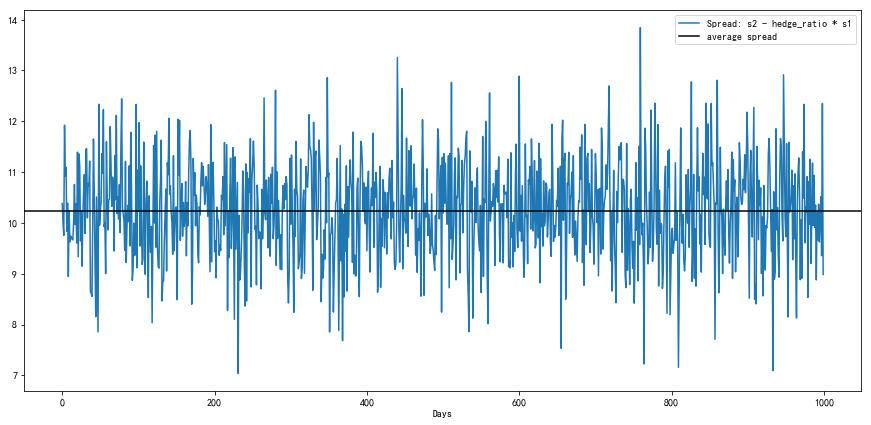

In [40]:
spread.plot(figsize=(15,7)) 
plt.axhline(spread.mean(), color='black') 
plt.xlabel('Days')
plt.legend(['Spread: s2 - hedge_ratio * s1', 'average spread'])
plt.show()

## Let's see what we get if we include the intercept of the regression

In [42]:
spread_with_intercept = s2 - (s1 * hedge_ratio + intercept)
#print(f"Average spread with intercept included is {spread_with_intercept.mean()}")
print("Average spread with intercept included is {}".format(spread_with_intercept.mean))

Average spread with intercept included is <bound method Series.mean of 0      0.13656098
1     -0.23730434
2     -0.49112944
3      1.67939529
4      0.67797630
5      0.84946724
6     -0.40727207
7      0.14435679
8     -1.29829673
9      0.00152798
10    -0.61416163
11    -0.50172546
12    -0.52921820
13    -0.57068594
14    -0.57667472
15    -0.19114831
16     0.51348634
17    -0.27455891
18     0.12912478
19    -0.63890109
20     1.14890561
21    -0.90959352
22     1.11388922
23     0.85877258
24    -0.60049507
25    -0.01357386
26    -1.09462627
27    -0.15031703
28     0.35630934
29     0.70797658
          ...    
970   -0.18229353
971   -1.33395937
972    1.15765768
973    0.23990916
974    2.09001323
975   -0.63369308
976    0.06734059
977   -0.03254818
978    0.66784398
979   -1.70856951
980    0.57132102
981   -0.26731140
982    1.00886381
983   -1.03887990
984   -0.20092326
985    0.93348395
986   -0.29240744
987    0.69112453
988   -0.33270321
989    0.10752325
990   -1.36

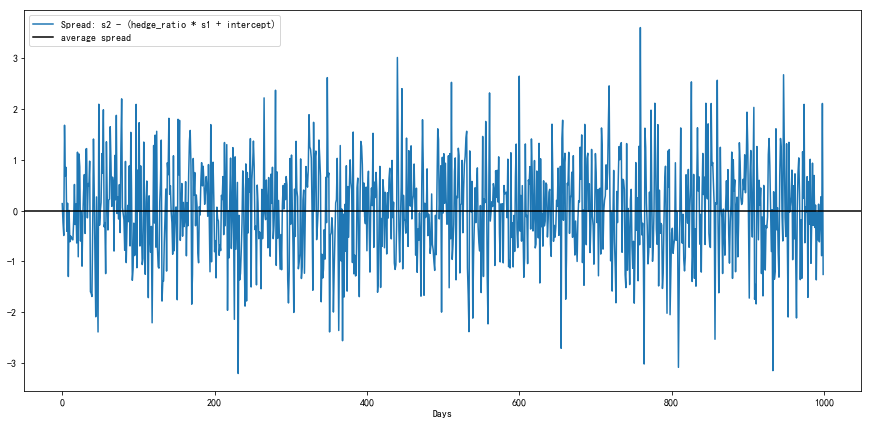

In [43]:
spread_with_intercept.plot(figsize=(15,7)) 
plt.axhline(spread_with_intercept.mean(), color='black') 
plt.xlabel('Days')
plt.legend(['Spread: s2 - (hedge_ratio * s1 + intercept)', 'average spread'])
plt.show()

## Quiz
### Check if spread is stationary using Augmented Dickey Fuller Test

The [adfuller](http://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html) function is part of the statsmodel library.

```
adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)[source]

adf (float) – Test statistic
pvalue (float) – p-value
...
```

In [44]:
def is_spread_stationary(spread, p_level=0.05):
    """
    spread: obtained from linear combination of two series with a hedge ratio
    
    p_level: level of significance required to reject null hypothesis of non-stationarity
    
    returns:
        True if spread can be considered stationary
        False otherwise
    """
    #TODO: use the adfuller function to check the spread
    adf_result = adfuller(spread)
    #get the p-value
    pvalue = adf_result[1]
    
    print("pvalue {}".format(pvalue))
    if pvalue <= p_level:
        print("pvalue is <= {}, assume spread is stationary".format(p_level))
        return True
    else:
        print("pvalue is > {}, assume spread is not stationary".format(p_level))
        return False
    
quiz_tests.test_is_spread_stationary(is_spread_stationary)

pvalue 0.0
pvalue is <= 0.05, assume spread is stationary
Tests Passed


In [ ]:
# Try out your function
print(f"Are the two series candidates for pairs trading? {is_spread_stationary(spread)}")

If you're stuck, you can also check out the solution [here](pairs_candidates_solution.ipynb)